#  Uploading Dataset (after performing encoding) in Google Colab


In [1]:
from google.colab import files
uploaded = files.upload()

Saving encoded_heart_stroke_data.csv to encoded_heart_stroke_data.csv


#Importing Necessary Libraries
In this project, we will use the following libraries:

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error


#Loading the Dataset

In [5]:
# Load the dataset
df = pd.read_csv('encoded_heart_stroke_data.csv')

In [6]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Private,Self_employed,Govt_job,children,Never_worked,Never_smoked,Formerly_smoked,Smokes,Unknown
0,9046,1,67.0,0,1,1,1,228.69,36.600000,1,1,0,0,0,0,0,1,0,0
1,51676,0,61.0,0,0,1,0,202.21,28.893237,1,0,1,0,0,0,1,0,0,0
2,31112,1,80.0,0,1,1,0,105.92,32.500000,1,1,0,0,0,0,1,0,0,0
3,60182,0,49.0,0,0,1,1,171.23,34.400000,1,1,0,0,0,0,0,0,1,0
4,1665,0,79.0,1,0,1,0,174.12,24.000000,1,0,1,0,0,0,1,0,0,0


In [7]:
# Separate features and target variable
X = df.drop('stroke', axis=1) # Features(independent variables)
y = df['stroke'] # Target (Dependent variable)

In [8]:
# Split data into training and test sets  (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,Private,Self_employed,Govt_job,children,Never_worked,Never_smoked,Formerly_smoked,Smokes,Unknown
802,4970,1,79.00,0,0,1,0,112.64,28.5,0,1,0,0,0,0,1,0,0
3927,56137,0,62.00,0,0,1,1,88.32,36.3,1,0,0,0,0,0,0,0,1
2337,54590,0,21.00,0,0,0,0,59.52,33.7,1,0,0,0,0,1,0,0,0
3910,36548,1,31.00,0,0,1,1,65.70,30.4,0,0,1,0,0,0,1,0,0
1886,61171,0,31.00,0,0,0,0,59.63,19.9,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,13846,1,43.00,0,0,1,0,88.00,30.6,0,0,1,0,0,1,0,0,0
466,1307,0,61.00,1,0,1,0,170.05,60.2,1,0,0,0,0,0,0,1,0
3092,31481,0,1.16,0,0,0,1,97.28,17.8,0,0,0,1,0,0,0,0,1
3772,61827,1,80.00,0,0,1,0,196.08,31.0,0,1,0,0,0,0,1,0,0


#1) Linear Regression Model
Linear Regression finds the best-fitting line to predict a continuous output (here, we’ll interpret it as a probability). It minimizes the sum of squared differences between actual and predicted values.

The equation is:

𝑦=𝛽0+𝛽1𝑥1+𝛽2𝑥2+⋯+𝛽𝑛𝑥𝑛

where 𝛽𝑖 are coefficients learned during training.

In [9]:
# Linear regression tries to predict a continuous target value by fitting a linear
# equation to the data.

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model using training data
linear_model.fit(X_train, y_train)

# Make predictions on test data
y_pred_linear = linear_model.predict(X_test)
# Calculate RMSE (Root Mean Square Error)
#  - lower values indicate better performance
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
print("Linear Regression RMSE:", rmse_linear*100)

Linear Regression RMSE: 22.712852481346346


In [12]:
# Calculate Accuracy for Linear regression
accuracy_linear=linear_model.score(X_test, y_test)*100
print("Linear Regression Accuracy:", accuracy_linear)

Linear Regression Accuracy: 9.472145147921884


#2) Lasso Regression Model
Lasso Regression adds an L1 penalty to the Linear Regression loss function. This penalty term (
𝜆
∑
∣
𝛽
𝑖
∣
) encourages the model to reduce some coefficients to zero, thus performing feature selection. It’s useful in reducing model complexity.

In [20]:
# Lasso regression adds an L1 penalty, which helps in feature selection
#by shrinking some coefficients to zero.

# Initialize the Lasso Regression model with a chosen alpha (regularization strength)
lasso_model = Lasso()
# Train the Lasso model
lasso_model.fit(X_train, y_train)
# Make predictions on test data
y_pred_lasso = lasso_model.predict(X_test)
# Calculate RMSE for Lasso regression
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print("Lasso Regression RMSE:", rmse_lasso*100)

Lasso Regression RMSE: 23.758795130268975


In [21]:
# Calculate Accuracy for Lasso regression
accuracy_lasso=lasso_model.score(X_test, y_test)*100
print("Lasso Regression Accuracy:", accuracy_lasso)

Lasso Regression Accuracy: 0.9424244362517764


#3) Ridge Regression Model
Ridge Regression adds an L2 penalty to the Linear Regression loss function. This penalty term (
𝜆
∑
𝛽
𝑖^
2
​
 ) discourages large coefficients and helps prevent overfitting without setting them to zero.

In [16]:
# Ridge regression adds an L2 penalty,
# reducing the impact of outliers and multicollinearity.

# Initialize the Ridge Regression model with regularization parameter alpha
ridge_model = Ridge()
# Train the Ridge model
ridge_model.fit(X_train, y_train)
# Make predictions on test data
y_pred_ridge = ridge_model.predict(X_test)

# Calculate RMSE for Ridge regression
rmse_ridge = np.sqrt(mean_squared_error(y_test,y_pred_ridge))
print("Ridge Regression RMSE:", rmse_ridge*100)

Ridge Regression RMSE: 22.712973944148548


In [17]:
# Calculate Accuracy for Ridge regression
accuracy_ridge=ridge_model.score(X_test, y_test)*100
print("Ridge Regression Accuracy:", accuracy_ridge)

Ridge Regression Accuracy: 9.471176903502732


#4) Logistic Regression Model

Logistic Regression is commonly used for classification. It predicts the probability that a given input belongs to a particular class, using a sigmoid function:

𝑃
(
𝑦
=
1
)
=
1/
1
+
𝑒
−
(
𝛽
0
+
𝛽
1
𝑥
1
+
⋯
+
𝛽
𝑛
𝑥
𝑛
)

where
𝛽
𝑖
​ are the model coefficients.

In [18]:
# Logistic regression is a classification algorithm
#and is suitable for predicting binary outcomes (0 or 1 in this case).

# Initialize the Logistic Regression model
logistic_model = LogisticRegression()
# Train the Logistic model
logistic_model.fit(X_train, y_train)

# Make predictions on test data
y_pred_logistic = logistic_model.predict(X_test)
# Calculate RMSE for Logistic regression
rmse_logistic = np.sqrt(mean_squared_error(y_test, y_pred_logistic))
print("Logistic Regression RMSE:", rmse_logistic*100)

Logistic Regression RMSE: 24.828176658071037


In [19]:
# Calculate Accuracy for Logistic regression
accuracy_logistic = logistic_model.score(X_test, y_test)*100
print("Logistic Regression Accuracy:", accuracy_logistic)

Logistic Regression Accuracy: 93.83561643835617


#Plot RMSE and Accuracy

### Plot RMSE for Linear, Lasso, Ridge and Logistic Models
This plot helps us compare the error (RMSE) for the four regression models.


We can plot RMSE for Linear, Lasso, and Ridge and Accuracy for Logistic Regression to compare model performances.

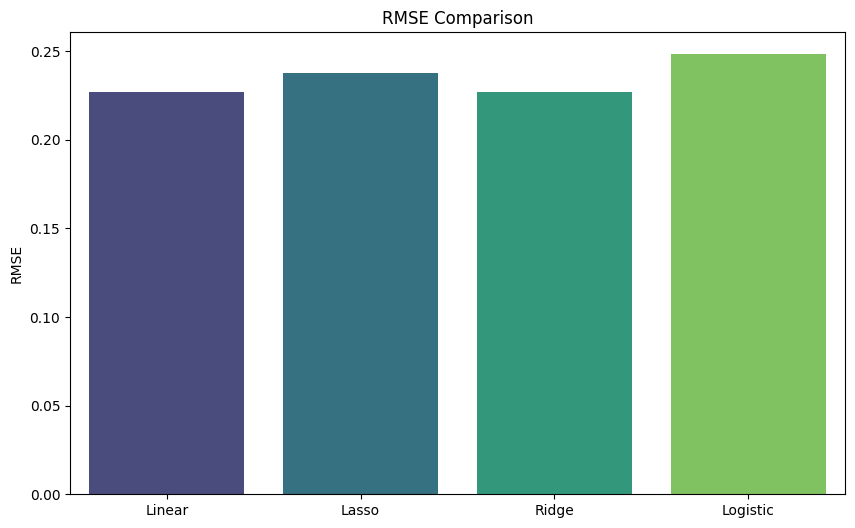

In [22]:
#Store RMSE values for easy plotting
rmse_values = [rmse_linear, rmse_lasso, rmse_ridge,rmse_logistic]
models = ['Linear', 'Lasso', 'Ridge', 'Logistic']

# Plot RMSE
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=rmse_values, palette='viridis')
plt.title('RMSE Comparison')
plt.ylabel('RMSE')
plt.show()

###RMSE Comparison:
**1)Linear Regression:**

RMSE: 22.71

Analysis: Linear Regression has the lowest RMSE, which indicates that its predictions are closer to the actual values in terms of error magnitude. However, this doesn’t translate to good classification accuracy, as RMSE is not typically a relevant metric for classification.

**2)Ridge Regression:**

RMSE: 22.71

Analysis: Ridge Regression has an RMSE comparable to Linear Regression. Although this suggests a similar prediction pattern, the model still fails to achieve satisfactory accuracy in classification.

**3)Lasso Regression:**

RMSE: 23.76

Analysis: Lasso Regression has a slightly higher RMSE than Linear and Ridge, indicating a slightly larger average prediction error. Still, the accuracy remains very low, showing that this model doesn’t perform well on classification tasks for this dataset.

**4)Logistic Regression:**

RMSE: 24.83

Analysis: Logistic Regression has the highest RMSE among the four models. However, RMSE is not a primary indicator of performance for a classification model. Despite the higher RMSE, Logistic Regression achieves excellent accuracy, making it the best model overall.

**Conclusion (RMSE):** While Linear and Ridge Regression have lower RMSE values, these models still do not perform well for classification. Logistic Regression, despite having a higher RMSE, excels in classification accuracy, which is the primary metric of interest here.

### Plot Accuracy for Linear, Lasso, Ridge and Logistic Models
This plot helps us compare the accuracies for the four regression models.


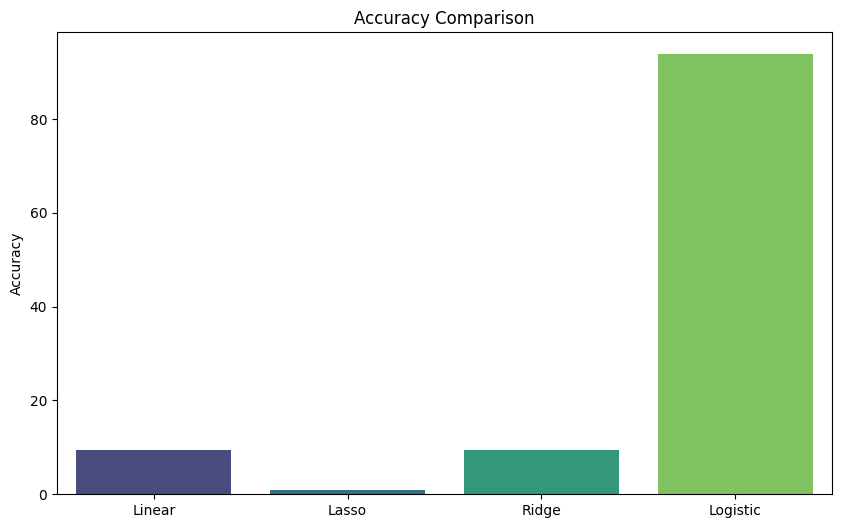

In [25]:
# Store Accuracies for easy plotting
accuracy_values = [accuracy_linear, accuracy_lasso, accuracy_ridge,accuracy_logistic]
models = ['Linear', 'Lasso', 'Ridge', 'Logistic']
#Accuracy Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracy_values, palette='viridis')
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

###Accuracy Comparison:
**1)Logistic Regression:**

Accuracy: 93.84%

Analysis: This model has the highest accuracy among all four, indicating it is the most reliable for classification tasks. Logistic Regression is specifically designed for binary classification, making it the ideal choice for predicting stroke occurrence.
**2)Linear Regression:**

Accuracy: 9.47%

Analysis: The accuracy is very low, showing that Linear Regression does not perform well in predicting the binary outcome of stroke. It’s evident that a model designed for regression tasks struggles in a classification scenario.

**3)Ridge Regression:**

Accuracy: 9.47%

Analysis: Similar to Linear Regression, Ridge Regression also performs poorly, confirming that regression models are not suitable for this classification problem.

**4)Lasso Regression:**

Accuracy: 0.94%

Analysis: Lasso Regression has the lowest accuracy among all models, reinforcing that it is not appropriate for this type of binary classification task.

**Conclusion (Accuracy):** Logistic Regression is by far the best model in terms of accuracy, while the other models (Linear, Ridge, and Lasso) perform poorly. This makes Logistic Regression the most suitable choice for accurate heart stroke prediction.

##Summary for RMSE and accuracy:
For accuracy, Logistic Regression is the top performer, making it the best choice for stroke prediction.

For RMSE, Linear and Ridge Regression have the lowest values, but this is not relevant to classification success, as these models yield low accuracy.


#Observations (comparing all models)
1)Logistic Regression is highly effective for this dataset, as it achieves the highest accuracy, making it the best choice among the tested models for heart stroke prediction.

2)Linear Regression is unsuitable for classification in this case, as it performs poorly in predicting the correct class despite a lower RMSE.

3)Lasso Regression fails to capture relevant patterns for classification in this dataset, resulting in low accuracy and a relatively high RMSE.

4)Ridge Regression, like Linear Regression, is not well-suited for this classification problem, as it yields low accuracy despite having a lower RMSE.

#Overall Conclusion:
Logistic Regression is the most effective model for this classification problem due to its high accuracy (93.84%), making it the best choice for heart stroke prediction.

Linear, Lasso, and Ridge Regression models, despite having lower RMSEs, fail to achieve acceptable accuracy levels, highlighting that these models are not appropriate for classification tasks in this context.

In summary, **Logistic Regression** outperforms the other models in terms of accuracy, making it the recommended model for heart stroke prediction in this project because it performs well for **categorical data**. The other regression models, while achieving lower RMSE values, do not provide meaningful classification results.